<a href="https://colab.research.google.com/github/Dimildizio/DS_course/blob/main/Time_series/Basic/Synth_ts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm


## Generate synthetic data for sime series

In [51]:
number = 100
periods = np.arange(number)
np.random.seed(42)

#### Add dates

In [49]:
t = pd.date_range(start='2023-01-01', periods=number, freq='MS')
t

DatetimeIndex(['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01',
               '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01',
               '2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01',
               '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01',
               '2024-09-01', '2024-10-01', '2024-11-01', '2024-12-01',
               '2025-01-01', '2025-02-01', '2025-03-01', '2025-04-01',
               '2025-05-01', '2025-06-01', '2025-07-01', '2025-08-01',
               '2025-09-01', '2025-10-01', '2025-11-01', '2025-12-01',
               '2026-01-01', '2026-02-01', '2026-03-01', '2026-04-01',
               '2026-05-01', '2026-06-01', '2026-07-01', '2026-08-01',
               '2026-09-01', '2026-10-01', '2026-11-01', '2026-12-01',
               '2027-01-01', '2027-02-01', '2027-03-01', '2027-04-01',
               '2027-05-01', '2027-06-01', '2027-07-01', '2027-08-01',
      

#### Add trend

In [53]:
trend  = 0.5 * periods

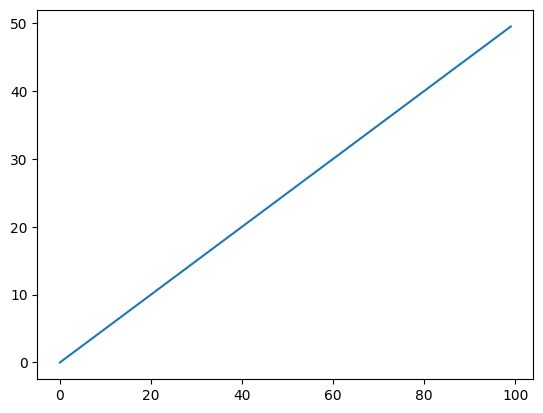

In [15]:
plt.plot(trend)

#### Add seasons

In [54]:
seasonal = 10 * np.sin(2 * np.pi * periods/12)

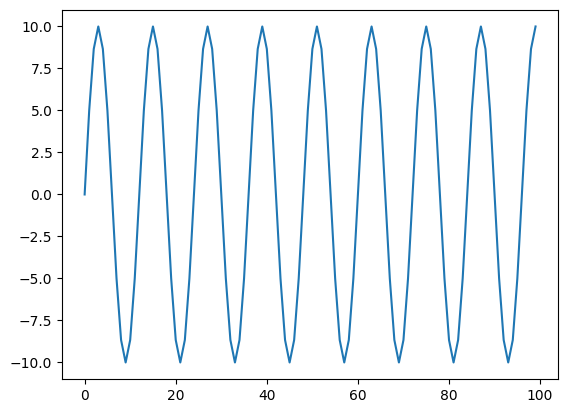

In [10]:
plt.plot(seasonal)

#### Add noise for residuals

In [55]:
noise = np.random.normal(scale=5, size=number)

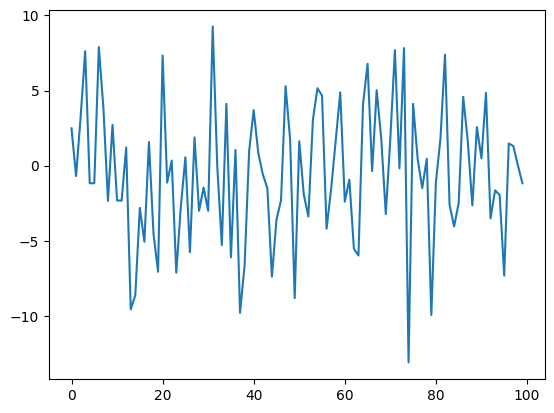

In [56]:
plt.plot(noise)

#### Compose

In [57]:
ts = trend + seasonal + noise

In [61]:
df = pd.DataFrame({'time':t, 'values':ts})
df.set_index('time', inplace=True)

In [62]:
df

,values
time,
2023-01-01,2.483571
2023-02-01,4.808678
2023-03-01,12.898697
2023-04-01,19.115149
2023-05-01,9.489487
...,...
2030-12-01,35.182425
2031-01-01,49.480601
2031-02-01,54.805276


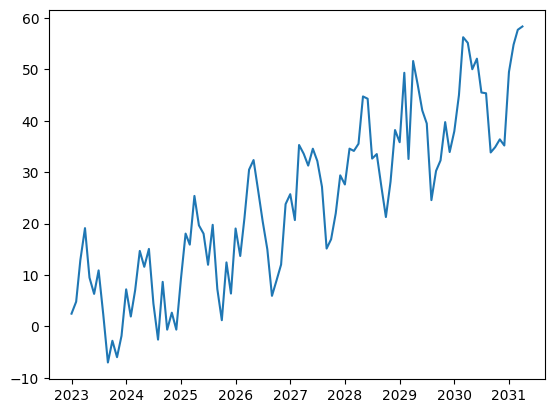

In [63]:
plt.plot(df)

## Decomposition using statsmodel

In [65]:
decomp = sm.tsa.seasonal_decompose(df['values'], model='additive', period=12)

In [85]:
trends = decomp.trend
seasons = decomp.seasonal
residuals = decomp.resid
altogether = trends + seasons + residuals

## Visualize

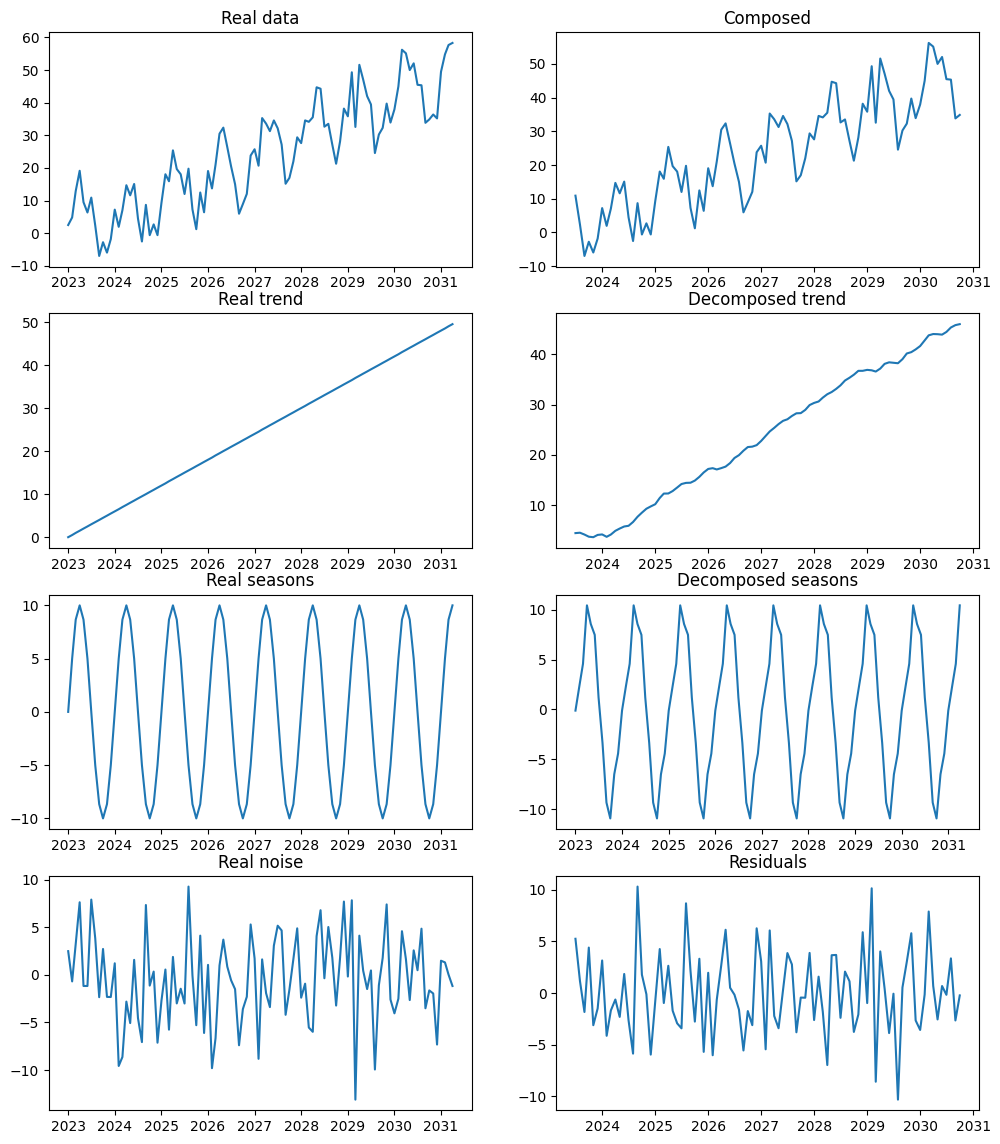

In [86]:
nrows, ncols = 4, 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12,14))

values = {0: {0: {'name': 'Real data', 'data':df['values']},
              1: {'name': 'Composed', 'data': altogether}},
          1: {0: {'name': 'Real trend', 'data': trend},
              1: {'name': 'Decomposed trend', 'data':trends}},
          2: {0: {'name': 'Real seasons', 'data': seasonal},
              1: {'name': 'Decomposed seasons', 'data':seasons}},
          3: {0: {'name': 'Real noise', 'data': noise},
              1: {'name': 'Residuals', 'data':residuals}}}

for row in range(nrows):
  for col in range(ncols):
    val = values[row][col]
    axes[row, col].plot(df.index, val['data'], label=val['name'])
    axes[row, col].set_title(val['name'])